# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Porto Seguro’s Safe Driver Prediction
### Predict if a driver will file an insurance claim next year.

Kaggle Link:https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

#### If the link is dead the problem description is below:

Overview

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.
Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.
In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

Evaluation

Scoring Metric
Submissions are evaluated using the Normalized Gini Coefficient.
During scoring, observations are sorted from the largest to the smallest predictions. Predictions are only used for ordering observations; therefore, the relative magnitude of the predictions are not used during scoring. The scoring algorithm then compares the cumulative proportion of positive class observations to a theoretical uniform proportion.
The Gini Coefficient ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score. The theoretical maximum for the discrete calculation is (1 - frac_pos) / 2.
The Normalized Gini Coefficient adjusts the score by the theoretical maximum so that the maximum score is 1.
The code to calculate Normalized Gini Coefficient in a number of different languages can be found in this forum thread.

Data Description

In this competition, you will predict the probability that an auto insurance policy holder files a claim.
In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.
File descriptions

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.

test.csv contains the test data.

sample_submission.csv is submission file showing the correct format.

In [1]:
# Author: Renan Hidani
# Udacity Capstone Machine Learning Nanodegree
# Porto Seguro's Safe Driver Prediction Competition

# Import Numpy and Pandas Library
import numpy as np
import pandas as pd

# Import Seaborn
import seaborn as sns
%matplotlib inline

# Pyplot
#import matplotlib as mpl
import matplotlib.pyplot as plt

# Import Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Import Library
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier,PassiveAggressiveClassifier

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

# Features available inside train and test files
features_train = ['id','target','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']
features_test = ['id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']

# Import Data, identify the missing values as nan
train_data = pd.read_csv('train.csv',na_values = -1)
test_data = pd.read_csv('test.csv', na_values = -1)

In [2]:
train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Get the ID Column for train and test data
train_id = train_data[['id']]
test_id = test_data[['id']]

# Get the target Column for train data
train_target = train_data[['target']]

## Bar Plot

Bar Graph below shows target feature and number of events

Number of Events (0) is ** 573.518 ** and number of Events (1) is ** 21,694 **

The ratio for target 1 is ** 1:26,4 ** approximately

This means that target value is _unbalanced_.

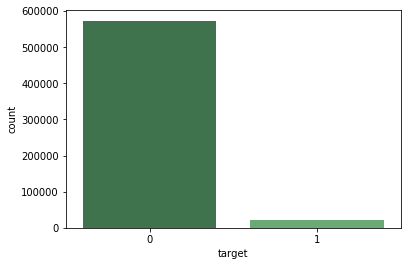

In [4]:
# Bar Graph
sns.countplot( x='target', data=train_data, palette="Greens_d")

## Visualizing Histogram Plot

It can be seen that some data are binary and others are categorical.

The designed name of each feature shows this property.

Every feature that have _bin, it means it's a binary feature.

Feature with _cat, means a categorical feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000251E5A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002681A2E8>]], dtype=object)

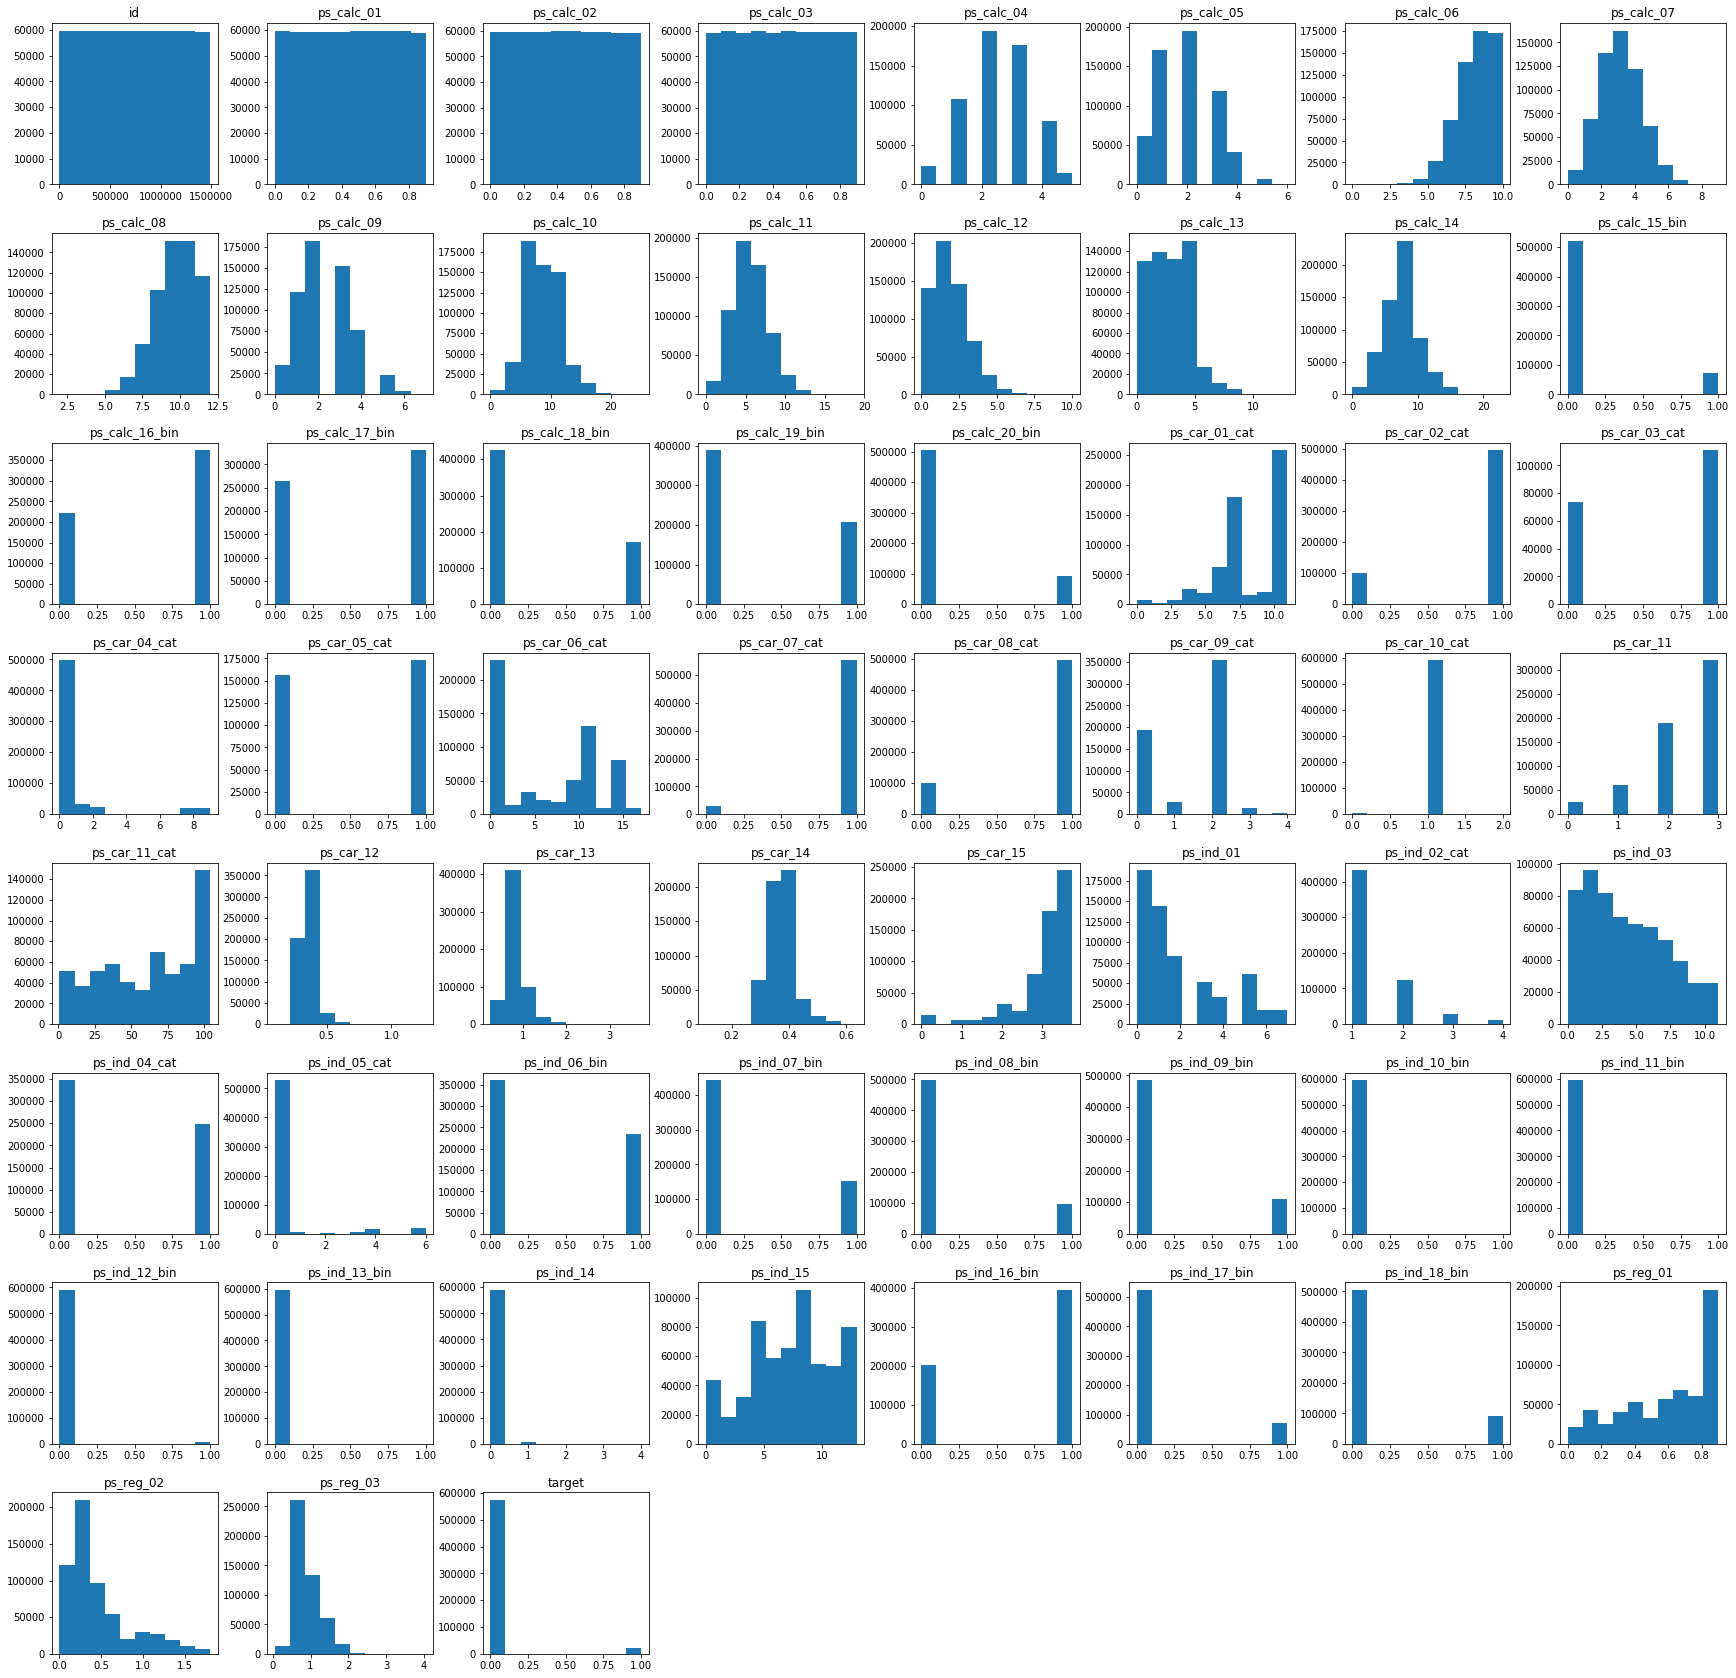

In [5]:
# Histogram Plot
train_data.hist(grid = False,figsize=(30, 30))

## Checking Data Type

* 39 int64

* 20 float64

In [6]:
#Check Data Type
train_data.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat     float64
ps_ind_03           int64
ps_ind_04_cat     float64
ps_ind_05_cat     float64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat     float64
ps_car_02_cat     float64
ps_car_03_cat     float64
ps_car_04_cat       int64
ps_car_05_cat     float64
ps_car_06_cat       int64
ps_car_07_cat     float64
ps_car_08_cat       int64
ps_car_09_cat     float64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11         float64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

## Checking Missing Values

* 13 features have missing values

In [7]:
# Check for Missing Values
train_data.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12          True
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

In [8]:
# Count Amount of missing values in each feature
train_data.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


## Visualizing Missing Data with Missingno

3 features have many values missing:

* ps_reg_03
* ps_car_03_cat
* ps_car_05_cat

How to interprete the Missingno plot:

* Gray Lines means no missing value
* White Lines means missing value

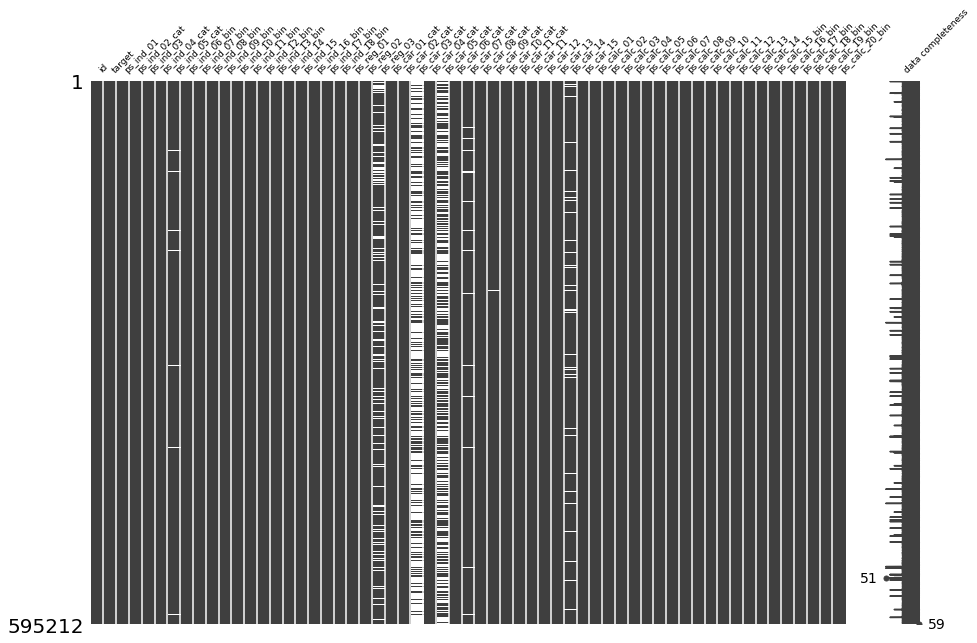

In [9]:
# Visualize Missing Data
# Import missingno library
import missingno as msno

msno.matrix(train_data, figsize = (15,10),fontsize = 9, labels = True)

## Correlation Plot

Shows _correlation_ between features.

It has been used the Seaborn library instead of the plt library

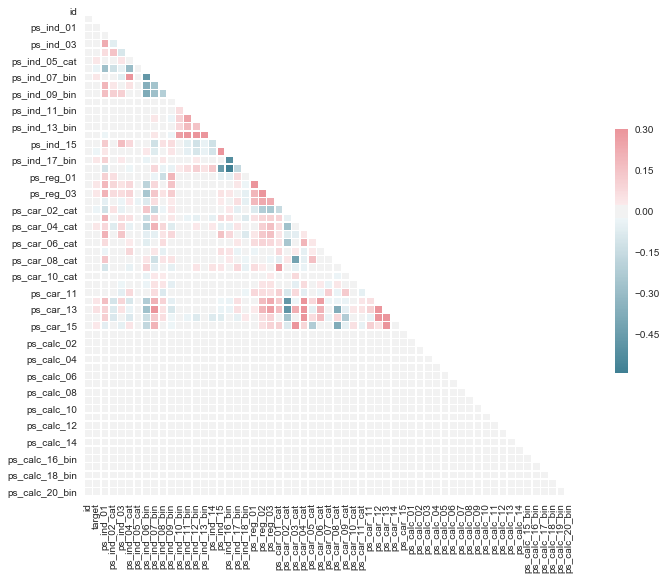

In [10]:
# Correlation Plot
#plt.matshow(train_data.corr() - Not good for visualization
sns.set(style="white")
# Compute the correlation matrix
corr = train_data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Dendrogram

The dendrogram is more visual friendly to check the correlation between data.

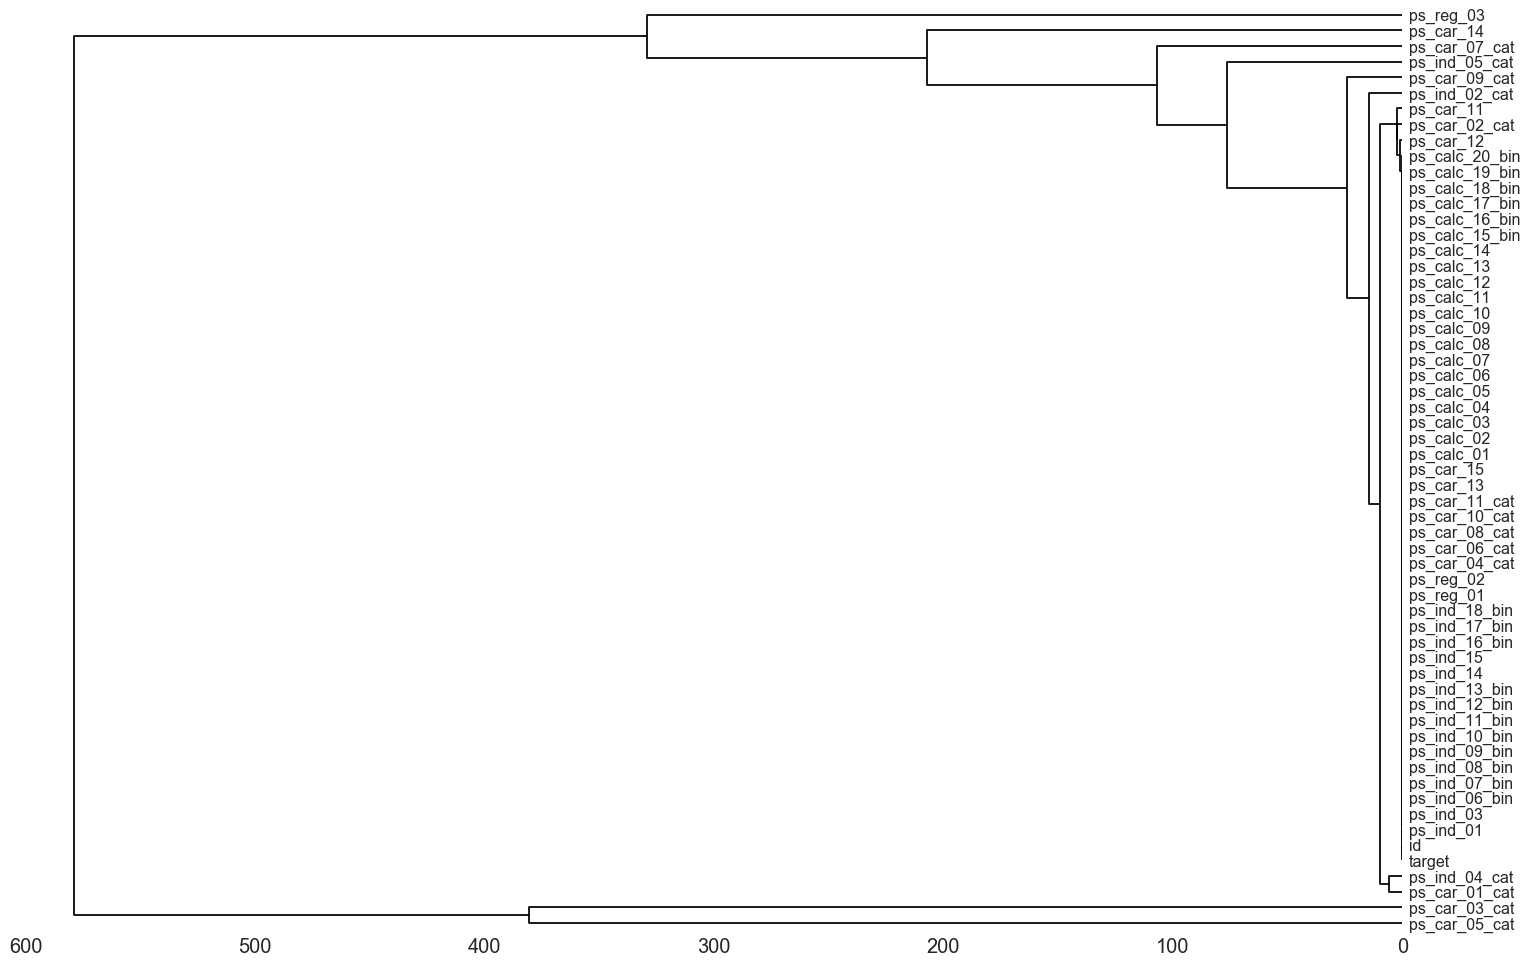

In [11]:
# Dendogram
msno.dendrogram(train_data)

## Removing Rows with nan Values

In [12]:
# Remove nan Features (-1)
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

## Counting the amount of missing records with and withou nan values

In [13]:
# Amount of Rows lost after Removing Nan Features in Rows
len(train_data.index)

595212

In [14]:
len(train_data_clean.index)

124931

In [15]:
"Percentage of Rows without missing values:" "{0:.1f}%".format(len(train_data_clean.index)*100/len(train_data.index))

'Percentage of Rows without missing values:20.0%'

## Choosing nan to load

**False** - Nan values are not considered for training

**True** - Nan values are considered for training

In [16]:
# Test algorithms with Nan Values
val_nan = False

## Applying SMOTE - Synthetic Minority Over-sampling Technique

In [17]:
# Import SMOTE to balance data
from imblearn.over_sampling import SMOTE

In [18]:
# Import Train Test Split Library
from sklearn.model_selection import train_test_split

train_data_sm = train_data_clean.drop(['id','target'],axis =1)
train_target_sm = train_data_clean[['target']]

x_train, x_val, y_train, y_val = train_test_split(train_data_sm, train_target_sm, test_size = .1, random_state = 12)

In [19]:
# Balance Data with Over-sampling
sm = SMOTE(ratio='auto', random_state=42, k=None, k_neighbors=5, m=None, m_neighbors=10, out_step=0.5, kind='regular', svm_estimator=None, n_jobs=1)
x_train_data_balanced,y_train_data_balanced = sm.fit_sample(x_train, y_train.values.ravel())

## Checking New Balanced Data

The new balanced datas have 214730 rows _x_train and y_train_.

x_train_data_balanced has the following:

* 57 Features, all features from train_data without ID and Target

y_train_data_balanced has the following:

* 1 Features, with just Target Balanced

In [20]:
# Testing Information Only with Balanced Data
x_train_data_balanced.shape

(214730L, 57L)

In [21]:
y_train_data_balanced.shape

(214730L,)

## IF condition to run GaussianNB, SVC, SGDClassifier, RandomForestClassifier(Only on available on capstone.py)


**False** - Don't run these 4 techniques with balanced data

**True** - Run these 4 techniques with balanced data

In [22]:
# Practice your Balanced Data
practicedata = False

## Naive Bayes with Balanced Data

In [23]:
# Balanced Dataset

# Naive Bayes with Balanced Data
clf_balanced_GaussianNB = GaussianNB()
clf_balanced_GaussianNB.fit(x_train_data_balanced,y_train_data_balanced)
y_predict_GaussianNB = clf_balanced_GaussianNB.predict(x_val)
y_true_GaussianNB = y_val

In [24]:
# Evaluation of GaussianNB with Balanced Data
print (classification_report(y_true_GaussianNB, y_predict_GaussianNB))

             precision    recall  f1-score   support

          0       0.96      0.50      0.66     11896
          1       0.05      0.56      0.10       598

avg / total       0.91      0.51      0.63     12494



In [25]:
print ("Confusion Matrix for GaussianNB with Balanced Data:")
print(confusion_matrix(y_true_GaussianNB, y_predict_GaussianNB))

Confusion Matrix for GaussianNB with Balanced Data:
[[5979 5917]
 [ 262  336]]


In [26]:
print ("AUC score for GaussianNB with Balanced Data:")
print(roc_auc_score(y_true_GaussianNB, y_predict_GaussianNB))

AUC score for GaussianNB with Balanced Data:
0.532239413827


## Support Vector Machine with Balanced Data

In [27]:
# Support Vector Machine with Balanced Data
clf_balanced_SVC = SVC(max_iter = 100,random_state=0)
clf_balanced_SVC.fit(x_train_data_balanced,y_train_data_balanced)
y_predict_SVC = clf_balanced_SVC.predict(x_val)
y_true_SVC = y_val

In [28]:
# Evaluation of SVC with Balanced Data
print (classification_report(y_true_SVC, y_predict_SVC))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     11896
          1       0.03      0.01      0.02       598

avg / total       0.91      0.94      0.92     12494



In [29]:
print ("Confusion Matrix for SVC with Balanced Data:")
print(confusion_matrix(y_true_SVC, y_predict_SVC))

Confusion Matrix for SVC with Balanced Data:
[[11703   193]
 [  592     6]]


In [30]:
print ("AUC score for SVC with Balanced Data:")
print(roc_auc_score(y_true_SVC, y_predict_SVC))

AUC score for SVC with Balanced Data:
0.496904751998


## Linear Model with Balanced Data

In [31]:
# Linear Model with Balanced Data
clf_balanced_SGDClassifier = SGDClassifier(max_iter=5,random_state=0)
clf_balanced_SGDClassifier.fit(x_train_data_balanced,y_train_data_balanced)
y_predict_SGDClassifier = clf_balanced_SGDClassifier.predict(x_val)
y_true_SGDClassifier = y_val

In [32]:
# Evaluation of Linear Model with Balanced Data
print (classification_report(y_true_SGDClassifier, y_predict_SGDClassifier))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94     11896
          1       0.08      0.14      0.10       598

avg / total       0.91      0.88      0.90     12494



In [33]:
print ("Confusion Matrix for SGDClassifier with Balanced Data:")
print(confusion_matrix(y_true_SGDClassifier, y_predict_SGDClassifier))

Confusion Matrix for SGDClassifier with Balanced Data:
[[10918   978]
 [  513    85]]


In [34]:
print ("AUC score for SGDClassifier with Balanced Data:")
print(roc_auc_score(y_true_SGDClassifier, y_predict_SGDClassifier))

AUC score for SGDClassifier with Balanced Data:
0.529963979911


## Random Forest with Balanced Data

In [35]:
# Random Forest with Balanced Data
clf_balanced_RandomForestClassifier = RandomForestClassifier(random_state=0)
clf_balanced_RandomForestClassifier.fit(x_train_data_balanced,y_train_data_balanced)
y_predict_RandomForestClassifier = clf_balanced_RandomForestClassifier.predict(x_val)
y_true_RandomForestClassifier = y_val

In [36]:
# Evaluation of Random Forest with Balanced Data
print (classification_report(y_true_RandomForestClassifier, y_predict_RandomForestClassifier))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98     11896
          1       0.00      0.00      0.00       598

avg / total       0.91      0.95      0.93     12494



In [37]:
print ("Confusion Matrix for RandomForestClassifier with Balanced Data:")
print(confusion_matrix(y_true_RandomForestClassifier, y_predict_RandomForestClassifier))

Confusion Matrix for RandomForestClassifier with Balanced Data:
[[11894     2]
 [  598     0]]


In [38]:
print ("AUC score for RandomForestClassifier with Balanced Data:")
print(roc_auc_score(y_true_RandomForestClassifier, y_predict_RandomForestClassifier))

AUC score for RandomForestClassifier with Balanced Data:
0.49991593813


## Testing with Personal Information Only

In [39]:
# Personal Information only with Balanced
# Datas: x_train_data_balanced, y_train_data_balanced,x_val,y_val
# Personal information - Columns 0-17

x_train_data_balanced_ind = x_train_data_balanced[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
y_train_data_balanced_ind = y_train_data_balanced
x_val_ind = x_val[['ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin']]
y_val_ind = y_val

## Naive Bayes with Balanced Data - Personal Information Only

In [40]:
# Naive Bayes with Balanced Data - Personal Information Only
clf_balanced_GaussianNB_ind = GaussianNB()
clf_balanced_GaussianNB_ind.fit(x_train_data_balanced_ind,y_train_data_balanced_ind)
y_predict_GaussianNB_ind = clf_balanced_GaussianNB_ind.predict(x_val_ind)
y_true_GaussianNB_ind = y_val_ind

In [41]:
# Evaluation of GaussianNB with Balanced Data - Personal Information Only
print (classification_report(y_true_GaussianNB_ind, y_predict_GaussianNB_ind))

             precision    recall  f1-score   support

          0       0.96      0.24      0.39     11896
          1       0.05      0.81      0.10       598

avg / total       0.92      0.27      0.38     12494



In [42]:
print ("Confusion Matrix for GaussianNB with Balanced Data - Personal Information Only:")
print(confusion_matrix(y_true_GaussianNB_ind, y_predict_GaussianNB_ind))

Confusion Matrix for GaussianNB with Balanced Data - Personal Information Only:
[[2901 8995]
 [ 116  482]]


In [43]:
print ("AUC score for GaussianNB with Balanced Data - Personal Information Only:")
print(roc_auc_score(y_true_GaussianNB_ind, y_predict_GaussianNB_ind))

AUC score for GaussianNB with Balanced Data - Personal Information Only:
0.524941775207


## Support Vector Machine with Balanced Data - Personal Information Only

In [44]:
# Support Vector Machine with Balanced Data - Personal Information Only
clf_balanced_SVC_ind = SVC(max_iter = 100,random_state=0)
clf_balanced_SVC_ind.fit(x_train_data_balanced_ind,y_train_data_balanced_ind)
y_predict_SVC_ind = clf_balanced_SVC_ind.predict(x_val_ind)
y_true_SVC_ind = y_val

In [45]:
# Evaluation of SVC with Balanced Data - Personal Information Only
print (classification_report(y_true_SVC_ind, y_predict_SVC_ind))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93     11896
          1       0.04      0.09      0.06       598

avg / total       0.91      0.87      0.89     12494



In [46]:
print ("Confusion Matrix for SVC with Balanced Data - Personal Information Only:")
print(confusion_matrix(y_true_SVC_ind, y_predict_SVC_ind))

Confusion Matrix for SVC with Balanced Data - Personal Information Only:
[[10776  1120]
 [  546    52]]


In [47]:
print ("AUC score for SVC with Balanced Data - Personal Information Only:")
print(roc_auc_score(y_true_SVC_ind, y_predict_SVC_ind))

AUC score for SVC with Balanced Data - Personal Information Only:
0.496403613929


## Linear Model with Balanced Data - Personal Information Only

In [48]:
# Linear Model with Balanced Data - Personal Information Only
clf_balanced_SGDClassifier_ind = SGDClassifier(max_iter=5,random_state=0)
clf_balanced_SGDClassifier_ind.fit(x_train_data_balanced_ind,y_train_data_balanced_ind)
y_predict_SGDClassifier_ind = clf_balanced_SGDClassifier_ind.predict(x_val_ind)
y_true_SGDClassifier_ind = y_val

In [49]:
# Evaluation of Linear Model with Balanced Data - Personal Information Only
print (classification_report(y_true_SGDClassifier_ind, y_predict_SGDClassifier_ind))

             precision    recall  f1-score   support

          0       0.95      0.15      0.27     11896
          1       0.05      0.82      0.09       598

avg / total       0.90      0.19      0.26     12494



In [50]:
print ("Confusion Matrix for SGDClassifier with Balanced Data - Personal Information Only:")
print(confusion_matrix(y_true_SGDClassifier_ind, y_predict_SGDClassifier_ind))

Confusion Matrix for SGDClassifier with Balanced Data - Personal Information Only:
[[ 1842 10054]
 [  106   492]]


In [51]:
print ("AUC score for SGDClassifier with Balanced Data - Personal Information Only:")
print(roc_auc_score(y_true_SGDClassifier_ind, y_predict_SGDClassifier_ind))

AUC score for SGDClassifier with Balanced Data - Personal Information Only:
0.488792219301


## Random Forest with Balanced Data - Personal Information Only

In [52]:
# Random Forest with Balanced Data - Personal Information Only
clf_balanced_RandomForestClassifier_ind = RandomForestClassifier(random_state=0)
clf_balanced_RandomForestClassifier_ind.fit(x_train_data_balanced_ind,y_train_data_balanced_ind)
y_predict_RandomForestClassifier_ind = clf_balanced_RandomForestClassifier_ind.predict(x_val_ind)
y_true_RandomForestClassifier_ind = y_val

In [53]:
# Evaluation of Random Forest with Balanced Data - Personal Information Only
print (classification_report(y_true_RandomForestClassifier_ind, y_predict_RandomForestClassifier_ind))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97     11896
          1       0.08      0.02      0.03       598

avg / total       0.91      0.94      0.93     12494



In [54]:
print ("Confusion Matrix for RandomForestClassifier with Balanced Data - Personal Information Only:")
print(confusion_matrix(y_true_RandomForestClassifier_ind, y_predict_RandomForestClassifier_ind))

Confusion Matrix for RandomForestClassifier with Balanced Data - Personal Information Only:
[[11754   142]
 [  586    12]]


In [55]:
print ("AUC score for RandomForestClassifier with Balanced Data - Personal Information Only:")
print(roc_auc_score(y_true_RandomForestClassifier_ind, y_predict_RandomForestClassifier_ind))

AUC score for RandomForestClassifier with Balanced Data - Personal Information Only:
0.504065052079


## Testing with Region Information Only

In [56]:
# Region Information only with Balanced
# Datas: x_train_data_balanced, y_train_data_balanced,x_val,y_val
# Personal information - Columns 18-20

x_train_data_balanced_reg = x_train_data_balanced[:,[18,19,20]]
y_train_data_balanced_reg = y_train_data_balanced
x_val_reg = x_val[['ps_reg_01','ps_reg_02','ps_reg_03']]
y_val_reg = y_val

## Naive Bayes with Balanced Data - Region Information Only

In [57]:
# Naive Bayes with Balanced Data - Region Information Only
clf_balanced_GaussianNB_reg = GaussianNB()
clf_balanced_GaussianNB_reg.fit(x_train_data_balanced_reg,y_train_data_balanced_reg)
y_predict_GaussianNB_reg = clf_balanced_GaussianNB_reg.predict(x_val_reg)
y_true_GaussianNB_reg = y_val_reg

In [58]:
# Evaluation of GaussianNB with Balanced Data - Region Information Only
print (classification_report(y_true_GaussianNB_reg, y_predict_GaussianNB_reg))

             precision    recall  f1-score   support

          0       0.96      0.47      0.63     11896
          1       0.05      0.58      0.09       598

avg / total       0.91      0.47      0.60     12494



In [59]:
print ("Confusion Matrix for GaussianNB with Balanced Data - Region Information Only:")
print(confusion_matrix(y_true_GaussianNB_reg, y_predict_GaussianNB_reg))

Confusion Matrix for GaussianNB with Balanced Data - Region Information Only:
[[5543 6353]
 [ 254  344]]


In [60]:
print ("AUC score for GaussianNB with Balanced Data - Region Information Only:")
print(roc_auc_score(y_true_GaussianNB_reg, y_predict_GaussianNB_reg))

AUC score for GaussianNB with Balanced Data - Region Information Only:
0.520602889479


## Support Vector Machine with Balanced Data - Region Information Only

In [61]:
# Support Vector Machine with Balanced Data - Region Information Only
clf_balanced_SVC_reg = SVC(max_iter = 100,random_state=0)
clf_balanced_SVC_reg.fit(x_train_data_balanced_reg,y_train_data_balanced_reg)
y_predict_SVC_reg = clf_balanced_SVC_reg.predict(x_val_reg)
y_true_SVC_reg = y_val

In [62]:
# Evaluation of SVC with Balanced Data - Region Information Only
print (classification_report(y_true_SVC_reg, y_predict_SVC_reg))

             precision    recall  f1-score   support

          0       0.94      0.11      0.20     11896
          1       0.05      0.87      0.09       598

avg / total       0.90      0.15      0.20     12494



In [63]:
print ("Confusion Matrix for SVC with Balanced Data - Region Information Only:")
print(confusion_matrix(y_true_SVC_reg, y_predict_SVC_reg))

Confusion Matrix for SVC with Balanced Data - Region Information Only:
[[ 1356 10540]
 [   80   518]]


In [64]:
print ("AUC score for SVC with Balanced Data - Region Information Only:")
print(roc_auc_score(y_true_SVC_reg, y_predict_SVC_reg))

AUC score for SVC with Balanced Data - Region Information Only:
0.490104315438


## Linear Model with Balanced Data - Region Information Only

In [65]:
# Linear Model with Balanced Data - Region Information Only
clf_balanced_SGDClassifier_reg = SGDClassifier(max_iter=5,random_state=0)
clf_balanced_SGDClassifier_reg.fit(x_train_data_balanced_reg,y_train_data_balanced_reg)
y_predict_SGDClassifier_reg = clf_balanced_SGDClassifier_reg.predict(x_val_reg)
y_true_SGDClassifier_reg = y_val

In [66]:
# Evaluation of Linear Model with Balanced Data - Region Information Only
print (classification_report(y_true_SGDClassifier_reg, y_predict_SGDClassifier_reg))

             precision    recall  f1-score   support

          0       0.96      0.72      0.82     11896
          1       0.06      0.35      0.10       598

avg / total       0.91      0.70      0.78     12494



In [67]:
print ("Confusion Matrix for SGDClassifier with Balanced Data - Region Information Only:")
print(confusion_matrix(y_true_SGDClassifier_reg, y_predict_SGDClassifier_reg))

Confusion Matrix for SGDClassifier with Balanced Data - Region Information Only:
[[8524 3372]
 [ 387  211]]


In [68]:
print ("AUC score for SGDClassifier with Balanced Data - Region Information Only:")
print(roc_auc_score(y_true_SGDClassifier_reg, y_predict_SGDClassifier_reg))

AUC score for SGDClassifier with Balanced Data - Region Information Only:
0.534693092645


## Random Forest with Balanced Data - Region Information Only

In [69]:
# Random Forest with Balanced Data - Region Information Only
clf_balanced_RandomForestClassifier_reg = RandomForestClassifier(random_state=0)
clf_balanced_RandomForestClassifier_reg.fit(x_train_data_balanced_reg,y_train_data_balanced_reg)
y_predict_RandomForestClassifier_reg = clf_balanced_RandomForestClassifier_reg.predict(x_val_reg)
y_true_RandomForestClassifier_reg = y_val

In [70]:
# Evaluation of Random Forest with Balanced Data - Region Information Only
print (classification_report(y_true_RandomForestClassifier_reg, y_predict_RandomForestClassifier_reg))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     11896
          1       0.06      0.02      0.03       598

avg / total       0.91      0.94      0.92     12494



In [71]:
print ("Confusion Matrix for RandomForestClassifier with Balanced Data - Region Information Only:")
print(confusion_matrix(y_true_RandomForestClassifier_reg, y_predict_RandomForestClassifier_reg))

Confusion Matrix for RandomForestClassifier with Balanced Data - Region Information Only:
[[11692   204]
 [  584    14]]


In [72]:
print ("AUC score for RandomForestClassifier with Balanced Data - Region Information Only:")
print(roc_auc_score(y_true_RandomForestClassifier_reg, y_predict_RandomForestClassifier_reg))

AUC score for RandomForestClassifier with Balanced Data - Region Information Only:
0.503131374926


## Testing with Auto Information Only

In [73]:
# Auto Information only with Balanced
# Datas: x_train_data_balanced, y_train_data_balanced,x_val,y_val
# Personal information - Columns 21-36

x_train_data_balanced_auto = x_train_data_balanced[:,[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]]
y_train_data_balanced_auto = y_train_data_balanced
x_val_auto = x_val[['ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15']]
y_val_auto = y_val

## Naive Bayes with Balanced Data - Auto Information Only

In [74]:
# Naive Bayes with Balanced Data - Auto Information Only
clf_balanced_GaussianNB_auto = GaussianNB()
clf_balanced_GaussianNB_auto.fit(x_train_data_balanced_auto,y_train_data_balanced_auto)
y_predict_GaussianNB_auto = clf_balanced_GaussianNB_auto.predict(x_val_auto)
y_true_GaussianNB_auto = y_val_reg

In [75]:
# Evaluation of GaussianNB with Balanced Data - Auto Information Only
print (classification_report(y_true_GaussianNB_auto, y_predict_GaussianNB_auto))

             precision    recall  f1-score   support

          0       0.96      0.48      0.64     11896
          1       0.06      0.61      0.10       598

avg / total       0.92      0.49      0.61     12494



In [76]:
print ("Confusion Matrix for GaussianNB with Balanced Data - Auto Information Only:")
print(confusion_matrix(y_true_GaussianNB_auto, y_predict_GaussianNB_auto))

Confusion Matrix for GaussianNB with Balanced Data - Auto Information Only:
[[5715 6181]
 [ 231  367]]


In [77]:
print ("AUC score for GaussianNB with Balanced Data - Auto Information Only:")
print(roc_auc_score(y_true_GaussianNB_auto, y_predict_GaussianNB_auto))

AUC score for GaussianNB with Balanced Data - Auto Information Only:
0.54706297949


## Support Vector Machine with Balanced Data - Auto Information Only

In [78]:
# Support Vector Machine with Balanced Data - Auto Information Only
clf_balanced_SVC_auto = SVC(max_iter = 100,random_state=0)
clf_balanced_SVC_auto.fit(x_train_data_balanced_auto,y_train_data_balanced_auto)
y_predict_SVC_auto = clf_balanced_SVC_auto.predict(x_val_auto)
y_true_SVC_auto = y_val

In [79]:
# Evaluation of SVC with Balanced Data - Auto Information Only
print (classification_report(y_true_SVC_auto, y_predict_SVC_auto))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96     11896
          1       0.03      0.03      0.03       598

avg / total       0.91      0.92      0.91     12494



In [80]:
print ("Confusion Matrix for SVC with Balanced Data - Auto Information Only:")
print(confusion_matrix(y_true_SVC_auto, y_predict_SVC_auto))

Confusion Matrix for SVC with Balanced Data - Auto Information Only:
[[11477   419]
 [  583    15]]


In [81]:
print ("AUC score for SVC with Balanced Data - Auto Information Only:")
print(roc_auc_score(y_true_SVC_auto, y_predict_SVC_auto))

AUC score for SVC with Balanced Data - Auto Information Only:
0.494930844352


## Linear Model with Balanced Data - Auto Information Only

In [82]:
# Linear Model with Balanced Data - Auto Information Only
clf_balanced_SGDClassifier_auto = SGDClassifier(max_iter=5,random_state=0)
clf_balanced_SGDClassifier_auto.fit(x_train_data_balanced_auto,y_train_data_balanced_auto)
y_predict_SGDClassifier_auto = clf_balanced_SGDClassifier_auto.predict(x_val_auto)
y_true_SGDClassifier_auto = y_val

In [83]:
# Evaluation of Linear Model with Balanced Data - Auto Information Only
print (classification_report(y_true_SGDClassifier_auto, y_predict_SGDClassifier_auto))

             precision    recall  f1-score   support

          0       0.96      0.81      0.88     11896
          1       0.06      0.24      0.10       598

avg / total       0.91      0.79      0.84     12494



In [84]:
print ("Confusion Matrix for SGDClassifier with Balanced Data - Auto Information Only:")
print(confusion_matrix(y_true_SGDClassifier_auto, y_predict_SGDClassifier_auto))

Confusion Matrix for SGDClassifier with Balanced Data - Auto Information Only:
[[9680 2216]
 [ 452  146]]


In [85]:
print ("AUC score for SGDClassifier with Balanced Data - Auto Information Only:")
print(roc_auc_score(y_true_SGDClassifier_auto, y_predict_SGDClassifier_auto))

AUC score for SGDClassifier with Balanced Data - Auto Information Only:
0.528933027149


## Random Forest with Balanced Data - Auto Information Only

In [86]:
# Random Forest with Balanced Data - Auto Information Only
clf_balanced_RandomForestClassifier_auto = RandomForestClassifier(random_state=0)
clf_balanced_RandomForestClassifier_auto.fit(x_train_data_balanced_auto,y_train_data_balanced_auto)
y_predict_RandomForestClassifier_auto = clf_balanced_RandomForestClassifier_auto.predict(x_val_auto)
y_true_RandomForestClassifier_auto = y_val

In [87]:
# Evaluation of Random Forest with Balanced Data - Auto Information Only
print (classification_report(y_true_RandomForestClassifier_auto, y_predict_RandomForestClassifier_auto))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     11896
          1       0.05      0.02      0.03       598

avg / total       0.91      0.94      0.92     12494



In [88]:
print ("Confusion Matrix for RandomForestClassifier with Balanced Data - Auto Information Only:")
print(confusion_matrix(y_true_RandomForestClassifier_auto, y_predict_RandomForestClassifier_auto))

Confusion Matrix for RandomForestClassifier with Balanced Data - Auto Information Only:
[[11673   223]
 [  586    12]]


In [89]:
print ("AUC score for RandomForestClassifier with Balanced Data - Auto Information Only:")
print(roc_auc_score(y_true_RandomForestClassifier_auto, y_predict_RandomForestClassifier_auto))

AUC score for RandomForestClassifier with Balanced Data - Auto Information Only:
0.500660546363


## Testing with Calc Information Only

In [90]:
# Calc Information only with Balanced
# Datas: x_train_data_balanced, y_train_data_balanced,x_val,y_val
# Personal information - Columns 37-56

x_train_data_balanced_calc = x_train_data_balanced[:,[37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
y_train_data_balanced_calc = y_train_data_balanced
x_val_calc = x_val[['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']]
y_val_calc = y_val

## Naive Bayes with Balanced Data - Calc Information Only

In [91]:
# Naive Bayes with Balanced Data - Calc Information Only
clf_balanced_GaussianNB_calc = GaussianNB()
clf_balanced_GaussianNB_calc.fit(x_train_data_balanced_calc,y_train_data_balanced_calc)
y_predict_GaussianNB_calc = clf_balanced_GaussianNB_calc.predict(x_val_calc)
y_true_GaussianNB_calc = y_val_reg

In [92]:
# Evaluation of GaussianNB with Balanced Data - Calc Information Only
print (classification_report(y_true_GaussianNB_calc, y_predict_GaussianNB_calc))

             precision    recall  f1-score   support

          0       0.95      0.67      0.78     11896
          1       0.05      0.32      0.08       598

avg / total       0.91      0.65      0.75     12494



In [93]:
print ("Confusion Matrix for GaussianNB with Balanced Data - Calc Information Only:")
print(confusion_matrix(y_true_GaussianNB_calc, y_predict_GaussianNB_calc))

Confusion Matrix for GaussianNB with Balanced Data - Calc Information Only:
[[7939 3957]
 [ 405  193]]


In [94]:
print ("AUC score for GaussianNB with Balanced Data - Calc Information Only:")
print(roc_auc_score(y_true_GaussianNB_calc, y_predict_GaussianNB_calc))

AUC score for GaussianNB with Balanced Data - Calc Information Only:
0.495054828581


## Support Vector Machine with Balanced Data - Calc Information Only

In [95]:
# Support Vector Machine with Balanced Data - Calc Information Only
clf_balanced_SVC_calc = SVC(max_iter = 100,random_state=0)
clf_balanced_SVC_calc.fit(x_train_data_balanced_calc,y_train_data_balanced_calc)
y_predict_SVC_calc = clf_balanced_SVC_calc.predict(x_val_calc)
y_true_SVC_calc = y_val

In [96]:
# Evaluation of SVC with Balanced Data - Calc Information Only
print (classification_report(y_true_SVC_calc, y_predict_SVC_calc))

             precision    recall  f1-score   support

          0       0.95      0.77      0.85     11896
          1       0.04      0.20      0.07       598

avg / total       0.91      0.74      0.81     12494



In [97]:
print ("Confusion Matrix for SVC with Balanced Data - Calc Information Only:")
print(confusion_matrix(y_true_SVC_calc, y_predict_SVC_calc))

Confusion Matrix for SVC with Balanced Data - Calc Information Only:
[[9134 2762]
 [ 476  122]]


In [98]:
print ("AUC score for SVC with Balanced Data - Calc Information Only:")
print(roc_auc_score(y_true_SVC_calc, y_predict_SVC_calc))

AUC score for SVC with Balanced Data - Calc Information Only:
0.485917247134


## Linear Model with Balanced Data - Calc Information Only

In [99]:
# Linear Model with Balanced Data - Calc Information Only
clf_balanced_SGDClassifier_calc = SGDClassifier(max_iter=5,random_state=0)
clf_balanced_SGDClassifier_calc.fit(x_train_data_balanced_calc,y_train_data_balanced_calc)
y_predict_SGDClassifier_calc = clf_balanced_SGDClassifier_calc.predict(x_val_calc)
y_true_SGDClassifier_calc = y_val

In [100]:
# Evaluation of Linear Model with Balanced Data - Calc Information Only
print (classification_report(y_true_SGDClassifier_calc, y_predict_SGDClassifier_calc))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     11896
          1       0.05      1.00      0.09       598

avg / total       0.00      0.05      0.00     12494



In [101]:
print ("Confusion Matrix for SGDClassifier with Balanced Data - Calc Information Only:")
print(confusion_matrix(y_true_SGDClassifier_calc, y_predict_SGDClassifier_calc))

Confusion Matrix for SGDClassifier with Balanced Data - Calc Information Only:
[[    0 11896]
 [    0   598]]


In [102]:
print ("AUC score for SGDClassifier with Balanced Data - Calc Information Only:")
print(roc_auc_score(y_true_SGDClassifier_calc, y_predict_SGDClassifier_calc))

AUC score for SGDClassifier with Balanced Data - Calc Information Only:
0.5


## Random Forest with Balanced Data - Calc Information Only

In [103]:
# Random Forest with Balanced Data - Calc Information Only
clf_balanced_RandomForestClassifier_calc = RandomForestClassifier(random_state=0)
clf_balanced_RandomForestClassifier_calc.fit(x_train_data_balanced_calc,y_train_data_balanced_calc)
y_predict_RandomForestClassifier_calc = clf_balanced_RandomForestClassifier_calc.predict(x_val_calc)
y_true_RandomForestClassifier_calc = y_val

In [104]:
# Evaluation of Random Forest with Balanced Data - Calc Information Only
print (classification_report(y_true_RandomForestClassifier_calc, y_predict_RandomForestClassifier_calc))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98     11896
          1       0.00      0.00      0.00       598

avg / total       0.91      0.95      0.93     12494



In [105]:
print ("Confusion Matrix for RandomForestClassifier with Balanced Data - Calc Information Only:")
print(confusion_matrix(y_true_RandomForestClassifier_calc, y_predict_RandomForestClassifier_calc))

Confusion Matrix for RandomForestClassifier with Balanced Data - Calc Information Only:
[[11896     0]
 [  598     0]]


In [106]:
print ("AUC score for RandomForestClassifier with Balanced Data - Calc Information Only:")
print(roc_auc_score(y_true_RandomForestClassifier_calc, y_predict_RandomForestClassifier_calc))

AUC score for RandomForestClassifier with Balanced Data - Calc Information Only:
0.5


## Removing all columns with Nan Values from Raw Data and scoring the probability

**Columns Removed**
- ID
- ps_ind_02_cat
- ps_ind_04_cat
- ps_ind_05_cat
- ps_reg_03
- ps_car_01_cat
- ps_car_02_cat
- ps_car_03_cat
- ps_car_05_cat
- ps_car_07_cat
- ps_car_09_cat
- ps_car_11
- ps_car_12
- ps_car_14

In [107]:
# Removing all Columns with Nan values:
# train_data.isnull().any()
# Columns: ps_ind_02_cat, ps_ind_04_cat, ps_ind_05_cat, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_09_cat, ps_car_11, ps_car_12, ps_car_14
# Columns Number: 2,4,5,21,22,23,24,26,28,30,33,34,36

# ID has already been dropped, Columns with Nan Values are removed
test_data_all = test_data.drop(['id','ps_ind_02_cat','ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12', 'ps_car_14'],axis=1)
x_train_data_balanced_all = x_train_data_balanced[:,[0,1,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,27,29,31,32,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
y_train_data_balanced_all = y_train_data_balanced

# Naive Bayes - Trained with Balanced Dataset
clf_all_GaussianNB = GaussianNB()
clf_all_GaussianNB.fit(x_train_data_balanced_all,y_train_data_balanced_all)
result_all_GaussianNB = clf_all_GaussianNB.predict_proba(test_data_all)

# Support Vector Machine - Trained with Balanced Dataset
clf_all_SVC = SVC(max_iter = 100,probability=True)
clf_all_SVC.fit(x_train_data_balanced_all,y_train_data_balanced_all)
result_all_SVC = clf_all_SVC.predict_proba(test_data_all)

# Linear Model - Trained with Balanced Dataset
clf_all_SGDClassifier = SGDClassifier(max_iter=5,loss = 'log')
clf_all_SGDClassifier.fit(x_train_data_balanced_all,y_train_data_balanced_all)
result_all_SGDClassifier = clf_all_SGDClassifier.predict_proba(test_data_all)

# Random Forest - Trained with Balanced Dataset
clf_all_RandomForestClassifier = RandomForestClassifier()
clf_all_RandomForestClassifier.fit(x_train_data_balanced_all,y_train_data_balanced_all)
result_all_RandomForestClassifier = clf_all_RandomForestClassifier.predict_proba(test_data_all)

## Scoring probability for each class of feature

## IF Condition to run probability for each class of feature(Only on available on capston.py)

**False** - Don't run these 4 techniques

**True** - Run these 4 techniques

In [108]:
# Want to score with different methods
scorediffm = False

## Personal Information Only

In [109]:
# Scoring with different Methods 

if val_nan == True:
    ### Only Personal Information with Nan Values
    x_ind = train_data.drop(['target','id','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
    y_ind = train_data[['target']]
    test_ind = test_data.drop(['id','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
elif val_nan == False:
    ### Only Personal Information without Nan values
    x_ind = train_data_clean.drop(['target','id','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
    y_ind = train_data_clean[['target']]
    test_ind = test_data_clean.drop(['id','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
else:
    print('val_nan got crazy!')

# Naive Bayes with Personal Information only - Trained with Balanced Dataset
clf_ind_GaussianNB = GaussianNB()
clf_ind_GaussianNB.fit(x_train_data_balanced_ind,y_train_data_balanced_ind)
result_ind_GaussianNB = clf_ind_GaussianNB.predict_proba(test_ind)

# Support Vector Machine with Personal Information only - Trained with Balanced Dataset
clf_ind_SVC = SVC(max_iter = 100,probability=True)
clf_ind_SVC.fit(x_train_data_balanced_ind,y_train_data_balanced_ind)
result_ind_SVC = clf_ind_SVC.predict_proba(test_ind)

# Linear Model with Personal Information only - Trained with Balanced Dataset
clf_ind_SGDClassifier = SGDClassifier(max_iter=5,loss = 'log')
clf_ind_SGDClassifier.fit(x_train_data_balanced_ind,y_train_data_balanced_ind)
result_ind_SGDClassifier = clf_ind_SGDClassifier.predict_proba(test_ind)

# Random Forest with Personal Information only - Trained with Balanced Dataset
clf_ind_RandomForestClassifier = RandomForestClassifier()
clf_ind_RandomForestClassifier.fit(x_train_data_balanced_ind,y_train_data_balanced_ind)
result_ind_RandomForestClassifier = clf_ind_RandomForestClassifier.predict_proba(test_ind)

## Region Information Only

In [110]:
if val_nan == True:
    ### Only Region Information with Nan Values
    x_reg = train_data.drop(['target','id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
    y_reg = train_data[['target']]
    test_reg = test_data.drop(['id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
elif val_nan == False:
    ### Only Region Information without Nan Values
    x_reg = train_data_clean.drop(['target','id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
    y_reg = train_data_clean[['target']]
    test_reg = test_data_clean.drop(['id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
else:
    print('val_nan got crazy!')

# Naive Bayes with Region Information only - Trained with Balanced Dataset
clf_reg_GaussianNB = GaussianNB()
clf_reg_GaussianNB.fit(x_train_data_balanced_reg,y_train_data_balanced_reg)
result_reg_GaussianNB = clf_reg_GaussianNB.predict_proba(test_reg)

# Linear Model with Region Information only - Trained with Balanced Dataset
clf_reg_SGDClassifier = SGDClassifier(max_iter=5,loss = 'log')
clf_reg_SGDClassifier.fit(x_train_data_balanced_reg,y_train_data_balanced_reg)
result_reg_SGDClassifier = clf_reg_SGDClassifier.predict_proba(test_reg)

# Random Forest with Region Information only - Trained with Balanced Dataset
clf_reg_RandomForestClassifier = RandomForestClassifier()
clf_reg_RandomForestClassifier.fit(x_train_data_balanced_reg,y_train_data_balanced_reg)
result_reg_RandomForestClassifier = clf_reg_RandomForestClassifier.predict_proba(test_reg)

# Support Vector Machine with Region Information only - Trained with Balanced Dataset
clf_reg_SVC = SVC(max_iter = 100,probability=True)
clf_reg_SVC.fit(x_train_data_balanced_reg,y_train_data_balanced_reg)
result_reg_SVC = clf_reg_SVC.predict_proba(test_reg)

## Auto Information Only

In [111]:
if val_nan == True:
    ### Only Auto Information with Nan Values
    x_auto = train_data.drop(['target','id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
    y_auto = train_data[['target']]
    test_auto = test_data.drop(['id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
elif val_nan == False:
    ### Only Auto Information without Nan Values
    x_auto = train_data_clean.drop(['target','id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
    y_auto = train_data_clean[['target']]
    test_auto = test_data_clean.drop(['id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin'], axis =1)
else:
    print('val_nan got crazy!')

# Naive Bayes with Auto Information only - Trained with Balanced Dataset
clf_car_GaussianNB = GaussianNB()
clf_car_GaussianNB.fit(x_train_data_balanced_auto,y_train_data_balanced_auto)
result_car_GaussianNB = clf_car_GaussianNB.predict_proba(test_auto)

# Linear Model with Auto Information only - Trained with Balanced Dataset
clf_car_SGDClassifier = SGDClassifier(max_iter=5,loss = 'log')
clf_car_SGDClassifier.fit(x_train_data_balanced_auto,y_train_data_balanced_auto)
result_car_SGDClassifier = clf_car_SGDClassifier.predict_proba(test_auto)

# Random Forest with Auto Information only - Trained with Balanced Dataset
clf_car_RandomForestClassifier = RandomForestClassifier()
clf_car_RandomForestClassifier.fit(x_train_data_balanced_auto,y_train_data_balanced_auto)
result_car_RandomForestClassifier = clf_car_RandomForestClassifier.predict_proba(test_auto)

# Support Vector Machine with Auto Information only - Trained with Balanced Dataset
clf_car_SVC = SVC(max_iter = 100,probability=True)
clf_car_SVC.fit(x_train_data_balanced_auto,y_train_data_balanced_auto)
result_car_SVC = clf_car_SVC.predict_proba(test_auto)

## Calc Information Only

In [112]:
if val_nan == True:
    ### Only calculated Information with Nan Values
    x_calc = train_data.drop(['target','id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15'], axis =1)
    y_calc = train_data[['target']]
    test_calc = test_data.drop(['id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15'], axis =1)
elif val_nan == False:
    ### Only calculated Information without Nan Values
    x_calc = train_data_clean.drop(['target','id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15'], axis =1)
    y_calc = train_data_clean[['target']]
    test_calc = test_data_clean.drop(['id','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15'], axis =1)
else:
    print('val_nan got crazy!')

# Naive Bayes with Calculated Information only - Trained with Balanced Dataset
clf_calc_GaussianNB = GaussianNB()
clf_calc_GaussianNB.fit(x_train_data_balanced_calc,y_train_data_balanced_calc)
result_calc_GaussianNB = clf_calc_GaussianNB.predict_proba(test_calc)

# Linear Model with Calculated Information only - Trained with Balanced Dataset
clf_calc_SGDClassifier = SGDClassifier(max_iter=5,loss = 'log')
clf_calc_SGDClassifier.fit(x_train_data_balanced_calc,y_train_data_balanced_calc)
result_calc_SGDClassifier = clf_calc_SGDClassifier.predict_proba(test_calc)

# Random Forest with Calculated Information only - Trained with Balanced Dataset
clf_calc_RandomForestClassifier = RandomForestClassifier()
clf_calc_RandomForestClassifier.fit(x_train_data_balanced_calc,y_train_data_balanced_calc)
result_calc_RandomForestClassifier = clf_calc_RandomForestClassifier.predict_proba(test_calc)

# Support Vector Machine with Calculated Information only - Trained with Balanced Dataset
clf_calc_SVC = SVC(max_iter = 100,probability=True)
clf_calc_SVC.fit(x_train_data_balanced_calc,y_train_data_balanced_calc)
result_calc_SVC = clf_calc_SVC.predict_proba(test_calc)

## For best features will be applied SelectKBest, VarianceThreshold, SelectPercentile

### Classification algorithms applied - chi2 and f_classif

## Variance Threshold

In [113]:
# Data Selection - Features

# Import the Feature Selection Library
from sklearn.feature_selection import SelectKBest, VarianceThreshold, SelectPercentile, chi2, f_classif

# Split train_data without missing values
x_train_data_selection = train_data_clean.drop(['id','target'], axis = 1)
y_train_data_selection = train_data_clean[['target']]

# New Array of Features without ID and Target
features_train_selection = ['ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']
features_test_selection = ['ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']

## Threshold Selection

In [114]:
# Threshold for VarianceThreshold
thresholdforpreprocessing = 0.1

In [115]:
# Apply VarianceThreshold to train_data
selector = VarianceThreshold(threshold=thresholdforpreprocessing)
variance_train_data = selector.fit_transform(x_train_data_selection,y_train_data_selection)

# Get Features from train_data - VarianceThreshold
variance_array = selector.get_support()

# Create list for feaatures that are removed through VarianceThreshold
variance_values_removed = []
variance_values_maintained = []

# List to Store the Features that are removed
for i in range(len(variance_array)):
    if variance_array[i] == False:
        variance_values_removed.insert(i,features_train_selection[i])
    else:
        variance_values_maintained.insert(i,features_train_selection[i])

In [116]:
# Features removed through VarianceThreshold
print('Features removed through VarianceThreshold:')
print(variance_values_removed)

Features removed through VarianceThreshold:
['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_reg_01', 'ps_car_07_cat', 'ps_car_10_cat', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']


In [117]:
# Amount of features Removed
len(variance_values_removed)

14

In [118]:
#Features maintained
print('Features maintained:')
print(variance_values_maintained)

Features maintained:
['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [119]:
# Amount of features Maintained
len(variance_values_maintained)

43

## SelectPercentile

## Percentage of Features to keep

In [120]:
# Percentage of Features to keep (%)
select_percentile = 50

In [121]:
# Amount of features after SelectPercentile
percentile_features_maintained = int(0.5*len(variance_values_maintained))
print('Amount of features maintained after select percentile')
print(percentile_features_maintained)

Amount of features maintained after select percentile
21


In [122]:
print('Percentage of Features Removed:')
print(select_percentile)

Percentage of Features Removed:
50


In [123]:
# Drop the Features from VarianceThreshold
x_train_data_selectpercentile = x_train_data_selection.drop(variance_values_removed, axis=1)
y_train_data_selectpercentile = y_train_data_selection

# Apply SelectPercentile to train data - Evaluation chi2
percentile = SelectPercentile(chi2, percentile = select_percentile)
percentile_train_data = percentile.fit(x_train_data_selectpercentile,y_train_data_selectpercentile)

# Get Features from train_data_selection - SelectPercentile
percentile_array = percentile_train_data.get_support()

# Create list for feaatures that are removed through SelectPercentile
percentile_values_removed = []
percentile_values_maintained = []

# List to Store the Features that are removed
for i in range(len(percentile_array)):
    if percentile_array[i] == False:
        percentile_values_removed.insert(i,variance_values_maintained[i])
    else:
        percentile_values_maintained.insert(i,variance_values_maintained[i])

In [124]:
# Features removed through SelectPercentile
print('Features removed through SelectPercentile:')
print(percentile_values_removed)

Features removed through SelectPercentile:
['ps_ind_02_cat', 'ps_ind_18_bin', 'ps_car_05_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [125]:
# Amount of features Removed
len(percentile_values_removed)

22

In [126]:
#Features maintained
print('Features maintained:')
print(percentile_values_maintained)

Features maintained:
['ps_ind_01', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_08_cat', 'ps_car_11_cat', 'ps_car_15']


In [127]:
# Amount of features Maintained
len(percentile_values_maintained)

21

## SelectKBest

## Amount of Features to keep - (80% from remaining features)

In [128]:
# Amount of Features to keep - SelectKBest
kbest_features = int(0.8*(len(percentile_values_maintained)))

In [129]:
# Amount of features after K Best
print('Amount of features maintained after KBest')
print(kbest_features)

Amount of features maintained after KBest
16


In [130]:
# Drop the Features from SelectPercentile
x_train_data_kbest = x_train_data_selectpercentile.drop(percentile_values_removed, axis=1)
y_train_data_kbest = y_train_data_selectpercentile

# Apply SelectKBest to data - Evaluation f_classif
selectK = SelectKBest(f_classif, k=kbest_features)
selectK_train_data = selectK.fit(x_train_data_kbest,y_train_data_kbest)

# Get Features from train_data_percentile - SelectKBest
selectK_array = selectK_train_data.get_support()

# Create list for feaatures that are removed through SelectKBest
selectK_values_removed = []
selectK_values_maintained = []

# List to Store the Features that are removed
for i in range(len(selectK_array)):
    if selectK_array[i] == False:
        selectK_values_removed.insert(i,percentile_values_maintained[i])
    else:
        selectK_values_maintained.insert(i,percentile_values_maintained[i])

In [131]:
# Features removed through SelectKBest
print('Features removed through SelectKBest:')
print(selectK_values_removed)

Features removed through SelectKBest:
['ps_ind_03', 'ps_ind_04_cat', 'ps_car_06_cat', 'ps_car_08_cat', 'ps_car_11_cat']


In [132]:
# Amount of features Removed
len(selectK_values_removed)

5

In [133]:
#Features maintained
print('Features maintained:')
print(selectK_values_maintained)

Features maintained:
['ps_ind_01', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_15']


In [134]:
# Amount of features Maintained
len(selectK_values_maintained)

16

## Scoring probability with Best Features only

In [135]:
# Scoring with Features Selected - Best Only

if val_nan == True:
    ### Best Features Only
    ## First Set of Features
    #(Removed Auto Information and Calculated Information) with Nan Values
    x_best = train_data[selectK_values_maintained]
    y_best = train_data[['target']]
    test_best = test_data[selectK_values_maintained]
elif val_nan == False:
    #(Removed Auto Information and Calculated Information) without Nan Values
    x_best = train_data_clean[selectK_values_maintained]
    y_best = train_data_clean[['target']]
    test_best = test_data_clean[selectK_values_maintained]
else:
    print('val_nan got crazy!')

## Since some algorithms don't run with missing values, it will be imput values

## IF Condition to imput values

**False** - Don't imput values

**True** - Imput values

In [136]:
# Imput Missing Values
missingvaluesimput = False

In [137]:
#Imputing missing values for both train and test
if missingvaluesimput == True:
    x_best.fillna(-999, inplace=True)
    test_best.fillna(-999,inplace=True)
else:
    print('No Imput Values has been made')

No Imput Values has been made


## IF Condition to run best features on techniques

**False** - Don't run

**True** - Run

In [138]:
# Use the 4 Techniques
techuse = False

In [139]:
if techuse == True:

    # Naive Bayes with Best Information only
    clf_best_GaussianNB = GaussianNB()
    clf_best_GaussianNB.fit(x_best,y_best)
    result_best_GaussianNB = clf_best_GaussianNB.predict_proba(test_best)

    # Linear Model with Best Information only
    clf_best_SGDClassifier = SGDClassifier(max_iter=5,loss = 'log')
    clf_best_SGDClassifier.fit(x_best,y_best)
    result_best_SGDClassifier = clf_best_SGDClassifier.predict_proba(test_best)

    # Random Forest with Best Information only
    clf_best_RandomForestClassifier = RandomForestClassifier()
    clf_best_RandomForestClassifier.fit(x_best,y_best)
    result_best_RandomForestClassifier = clf_best_RandomForestClassifier.predict_proba(test_best)

    # Support Vector Machine with Best Information only
    clf_best_SVC = SVC(max_iter = 100,probability=True)
    clf_best_SVC.fit(x_best,y_best)
    result_best_SVC = clf_best_SVC.predict_proba(test_best)
else:
    print('4 techniques not used')   

4 techniques not used


## Tryouts with others classifiers

In [140]:
# Try outs with another techniques - Best Features only
# Import Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## IF Condition to run best features on other techniques

**False** - Don't run

**True** - Run

In [141]:
# Use others techniques
otherstechuse = False

In [142]:
if otherstechuse == True:

    # Decision Tree Regression with best Information Only
    clf_best_DecisionTreeClassifier = DecisionTreeClassifier()
    clf_best_DecisionTreeClassifier.fit(x_best,y_best)
    result_best_DecisionTreeClassifier = clf_best_DecisionTreeClassifier.predict_proba(test_best)

    # AdaBoost Regressor with best Information only
    clf_best_AdaBoostClassifier = AdaBoostClassifier()
    clf_best_AdaBoostClassifier.fit(x_best,y_best)
    result_best_AdaBoostClassifier = clf_best_AdaBoostClassifier.predict_proba(test_best)

    # Gaussian Process Classifier with best Information only
    clf_best_GaussianProcessClassifier = GaussianProcessClassifier()
    clf_best_GaussianProcessClassifier.fit(x_best,y_best)
    result_best_GaussianProcessClassifier = clf_best_GaussianProcessClassifier.predict_proba(test_best)

    # K Nearest Neighboor Regressor with best Information only
    clf_best_KNeighborsClassifier = KNeighborsClassifier()
    clf_best_KNeighborsClassifier.fit(x_best,y_best)
    result_best_KNeighborsClassifier = clf_best_KNeighborsClassifier.predict_proba(test_best)

    # Passive Aggressive Regressor with best Information only
    clf_best_PassiveAggressiveClassifier = PassiveAggressiveClassifier()
    clf_best_PassiveAggressiveClassifier.fit(x_best,y_best)
    result_best_PassiveAggressiveClassifier = clf_best_PassiveAggressiveClassifier.predict_proba(test_best)
else:
    print('No other techniques has been used')

No other techniques has been used


## There are 2 great classifiers often used on Competition

- **CatBoost**
- **XGBoost**

## IF Condition to run best features on CatBoost

**False** - Don't run

**True** - Run

In [143]:
# The best 2 algorithms

# Wanna use CatBoost
catboostuse = False

In [144]:
if catboostuse == True:
    
    # Cat Boost Regressor with best Information only
    clf_best_CatBoostClassifier = CatBoostClassifier()
    clf_best_CatBoostClassifier.fit(x_best,y_best)
    result_best_CatBoostClassifier = clf_best_CatBoostClassifier.predict_proba(test_best)
else:
    print ('Cat Boost has not been used')

Cat Boost has not been used


## IF Condition to run best features on XGBoost

**False** - Don't run

**True** - Run

In [145]:
# Wanna use XGB
xgboostuse = True

In [146]:
if xgboostuse == True:

    # XGBoost with best Information only
    clf_best_XGB = XGBClassifier()
    clf_best_XGB.fit(x_best,y_best)
    result_best_XGB = clf_best_XGB.predict_proba(test_best)
else:
    print('XGB has not been used')    

## IF Condition to run best features on SVC, GaussianNB, SGDClassifier and RandomForestClassifier

**False** - Don't run

**True** - Run

In [147]:
best_training = True

## Naive Bayes with Balanced data and Best Features

In [148]:
x_train_data_balanced_pre = pd.DataFrame(data = x_train_data_balanced, columns = features_train_selection)
x_best_2 = x_train_data_balanced_pre[selectK_values_maintained]
y_best_2 = y_train_data_balanced
test_best_2 = y_val
test_best_3 = x_val[selectK_values_maintained]
    
# Naive Bayes with Balanced Data - - Best Features
clf_balanced_GaussianNB_best = GaussianNB()
clf_balanced_GaussianNB_best.fit(x_best_2,y_best_2)
y_predict_GaussianNB_best = clf_balanced_GaussianNB_best.predict(test_best_3)
y_true_GaussianNB_best = test_best_2

In [149]:
# Evaluation of GaussianNB with Balanced Data - Best Features
print (classification_report(y_true_GaussianNB_best, y_predict_GaussianNB_best))

             precision    recall  f1-score   support

          0       0.96      0.61      0.75     11896
          1       0.06      0.52      0.11       598

avg / total       0.92      0.61      0.72     12494



In [150]:
print ("Confusion Matrix for GaussianNB with Balanced Data - Best Features:")
print(confusion_matrix(y_true_GaussianNB_best, y_predict_GaussianNB_best))

Confusion Matrix for GaussianNB with Balanced Data - Best Features:
[[7263 4633]
 [ 286  312]]


In [151]:
print ("AUC score for GaussianNB with Balanced Data - Best Features:")
print(roc_auc_score(y_true_GaussianNB_best, y_predict_GaussianNB_best))

AUC score for GaussianNB with Balanced Data - Best Features:
0.566140244437


## Support Vector Machine with Balanced Data and Best Features

In [152]:
# Support Vector Machine with Balanced Data - - Best Features
clf_balanced_SVC_best = SVC(max_iter = 100,random_state=0)
clf_balanced_SVC_best.fit(x_best_2,y_best_2)
y_predict_SVC_best = clf_balanced_SVC_best.predict(test_best_3)
y_true_SVC_best = test_best_2

In [153]:
# Evaluation of SVC with Balanced Data - Best Features
print (classification_report(y_true_SVC_best, y_predict_SVC_best))

             precision    recall  f1-score   support

          0       0.95      0.78      0.86     11896
          1       0.03      0.15      0.06       598

avg / total       0.90      0.75      0.82     12494



In [154]:
print ("Confusion Matrix for SVC with Balanced Data - Best Features:")
print(confusion_matrix(y_true_SVC_best, y_predict_SVC_best))

Confusion Matrix for SVC with Balanced Data - Best Features:
[[9338 2558]
 [ 508   90]]


In [155]:
print ("AUC score for SVC with Balanced Data - Best Features:")
print(roc_auc_score(y_true_SVC_best, y_predict_SVC_best))

AUC score for SVC with Balanced Data - Best Features:
0.467735704984


## Linear Model with Balanced Data and Best Features

In [156]:
# Linear Model with Balanced Data - Best Features
clf_balanced_SGDClassifier_best = SGDClassifier(max_iter=5,random_state=0)
clf_balanced_SGDClassifier_best.fit(x_best_2,y_best_2)
y_predict_SGDClassifier_best = clf_balanced_SGDClassifier_best.predict(test_best_3)
y_true_SGDClassifier_best = test_best_2

In [157]:
# Evaluation of Linear Model with Balanced Data - Best Features
print (classification_report(y_true_SGDClassifier_best, y_predict_SGDClassifier_best))

             precision    recall  f1-score   support

          0       0.96      0.20      0.33     11896
          1       0.05      0.85      0.10       598

avg / total       0.92      0.23      0.32     12494



In [158]:
print ("Confusion Matrix for SGDClassifier with Balanced Data - Best Features:")
print(confusion_matrix(y_true_SGDClassifier_best, y_predict_SGDClassifier_best))

Confusion Matrix for SGDClassifier with Balanced Data - Best Features:
[[2347 9549]
 [  90  508]]


In [159]:
print ("AUC score for SGDClassifier with Balanced Data - Best Features:")
print(roc_auc_score(y_true_SGDClassifier_best, y_predict_SGDClassifier_best))

AUC score for SGDClassifier with Balanced Data - Best Features:
0.52339576778


## Random Forest with Balanced Data and Best Features

In [160]:
# Random Forest with Balanced Data - Best Features
clf_balanced_RandomForestClassifier_best = RandomForestClassifier(random_state=0)
clf_balanced_RandomForestClassifier_best.fit(x_best_2,y_best_2)
y_predict_RandomForestClassifier_best = clf_balanced_RandomForestClassifier_best.predict(test_best_3)
y_true_RandomForestClassifier_best = test_best_2

In [161]:
# Evaluation of Random Forest with Balanced Data - Best Features
print (classification_report(y_true_RandomForestClassifier_best, y_predict_RandomForestClassifier_best))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97     11896
          1       0.03      0.00      0.00       598

avg / total       0.91      0.95      0.93     12494



In [162]:
print ("Confusion Matrix for RandomForestClassifier with Balanced Data - Best Features:")
print(confusion_matrix(y_true_RandomForestClassifier_best, y_predict_RandomForestClassifier_best))

Confusion Matrix for RandomForestClassifier with Balanced Data - Best Features:
[[11860    36]
 [  597     1]]


In [163]:
print ("AUC score for RandomForestClassifier with Balanced Data - Best Features:")
print(roc_auc_score(y_true_RandomForestClassifier_best, y_predict_RandomForestClassifier_best))

AUC score for RandomForestClassifier with Balanced Data - Best Features:
0.49932300675
